# Figure 1 

In [1]:
import numpy as np
import pandas as pd
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt

npr.seed(0)

In [2]:
from general_utilities import * #imports utilities.py file which has functions for plotting psychometrics and other useful things
from HMM_functions import * #imports HMM_functions.py file which has functions for getting the data read for the ssm.HMM
from functions_for_making_plots import * 

## Plotting preferences

In [3]:
colors = np.array([[0,102,51],[237,177,32],[233,0,111],[39,110,167]])/255

#Remove right and top spines from plots (personal preference)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
dpi = 100

## Figure 1B


Text(0, 0.5, 'Slope')

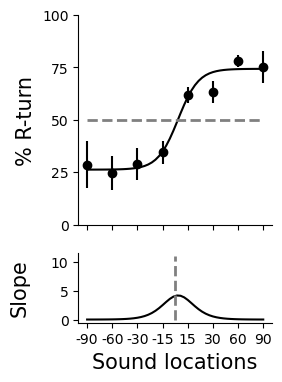

In [4]:
right_mean, right_std = figure_functions.calculate_right_stats(animal_ids, glm_data, psychometrics)

fig, axs = plt.subplots(2,1,figsize = (2.5,4), sharex=True, gridspec_kw={'height_ratios': [3, 1]}, dpi=dpi)
axs[0].scatter(list(range(0,8)), y = np.array(right_mean)*100, color='black')
axs[0].errorbar(list(range(0,8)), y = np.array(right_mean)*100, yerr=np.array(right_std)*100, color='black', linestyle='none')  # error bars
axs[0].plot(np.linspace(0, 7),psychometrics.fit_sigmoid(y_data=np.array(right_mean)*100), label='visual cues', color='black')
axs[0].hlines(y=50, xmin=0, xmax=7, colors='grey', linestyles='--', lw=2)
axs[0].set_xticks([])
axs[0].set_yticks([0, 25,50,75,100])
axs[1].set_xlabel('Sound locations', fontsize=15)
axs[0].set_ylabel('% R-turn', fontsize=15)

y_data = psychometrics.fit_sigmoid(y_data=np.array(right_mean)*100)
slopes = psychometrics.get_slope_measurement(y_data)

axs[1].plot(np.linspace(0, 7, 50), slopes, color = 'black')
axs[1].vlines(x=3.5, ymin=0, ymax=11, colors='grey', linestyles='--', lw=2)
axs[1].set_xticks(list(range(0,8)))
axs[1].set_yticks(np.linspace(0, 10, 3))
axs[1].set_xticklabels(['-90','-60','-30','-15','15','30','60','90'])
axs[1].set_ylabel('Slope', fontsize=15, labelpad=15)

#fig.savefig('psychometric_all_data.svg', format='svg', bbox_inches="tight")


## Figure 1C

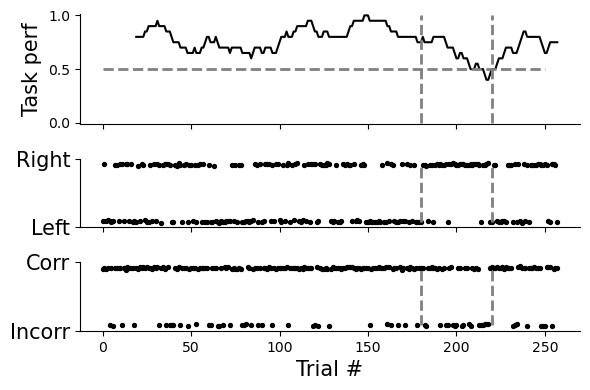

In [5]:
animal = 'B67'
date = "['140716']"

choice_sesh, correct_sesh, stim_sesh = figure_functions.extract_session_data(animal, date, animal_ids, glm_data)

x = list(range(0,len(choice_sesh)))

fig, axs = plt.subplots(3,1, figsize = (6,4), sharex=True, 
                        gridspec_kw={'height_ratios': [0.8, 0.5, 0.5]}, dpi=dpi)

axs[0].plot(figure_functions.get_moving_window(correct_sesh, 20), color='black')
axs[0].hlines(y=0.5, xmin=0, xmax=250, colors='grey', linestyles='--', lw=2)
axs[0].set_ylim((-0.01, 1.01))
axs[0].set_yticks([0, 0.5, 1])
axs[0].set_ylabel("Task perf", fontsize = 15)

for line in [0,1,2]:
    axs[line].vlines(x=180, ymin=0, ymax=1, colors='grey', linestyles='--', lw=2)
    axs[line].vlines(x=220, ymin=0, ymax=1, colors='grey', linestyles='--', lw=2)
    
choice_sesh = np.array(choice_sesh)
noise = np.random.normal(0, .01, choice_sesh.shape)
new_signal = choice_sesh + noise

axs[1].scatter(x,new_signal, color='black', s = 8) #s = 8
axs[1].set_yticks(ticks=[-.1, 1.1])
axs[1].set_yticklabels(labels=['Left','Right'], fontsize=15)

correct_sesh = np.array(correct_sesh)
noise = np.random.normal(0, .01, correct_sesh.shape)
new_signal = correct_sesh + noise

axs[2].scatter(x,new_signal, color='black', s = 8)
axs[2].set_yticks(ticks=[-.1, 1.1])
axs[2].set_yticklabels(labels=['Incorr','Corr'], fontsize=15)
#axs[3].set_title("Correct", fontsize = 15)
axs[2].set_xlabel("Trial #", fontsize = 15)

fig.tight_layout()

#fig.savefig('example_session.svg', format='svg', bbox_inches="tight")

## Figure 1E

In [6]:
num_states = 3    # number of discrete states
obs_dim = 1           # number of observed dimensions
num_categories = 2    # number of categories for output
input_dim = 4        # input dimensions

posterior_probs_rearrange, recovered_trans_mat, recovered_weights, right_states, psych_states, state_max_posterior, state_occupancies = figure_1.run_GLM_HMM(num_states, obs_dim, num_categories, input_dim, glm_data)

  0%|          | 0/2000 [00:00<?, ?it/s]

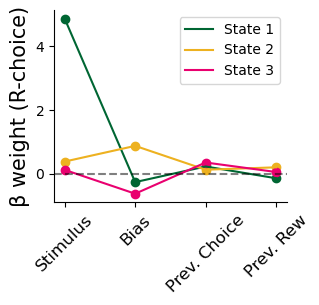

In [7]:
fig, axs = plt.subplots(1,1,figsize = (3,2.5), dpi=100)

state_names = ['State 1', 'State 2', 'State 3']

for k in range(num_states):
    axs.plot(range(input_dim), recovered_weights[k][0], color=colors[k],
                    lw=1.5,  label=state_names[k], linestyle = '-')
    axs.scatter(range(input_dim), recovered_weights[k][0], color=colors[k],
                )
    
axs.set_ylabel("β weight (R-choice)", size=15)
axs.set_xticks([0, 1, 2, 3])
axs.set_xticklabels(['Stimulus', 'Bias', 'Prev. Choice', 'Prev. Rew'], rotation=45, fontsize=12)
axs.legend(loc="best")
axs.axhline(y=0, color="k", alpha=0.5, ls="--")

#plt.savefig('Bweights.svg', format='svg', bbox_inches="tight")

## Figure 1F

[57.87978639 18.97511646 23.14509715]


Text(0.5, 0, '% Occupancy')

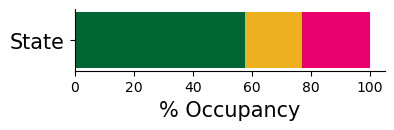

In [8]:
perc_state_occ = figure_functions.calculate_percentage_state_occupancies(state_occupancies)

print(perc_state_occ)
fig, axs = plt.subplots(1,figsize = (4,0.8), facecolor='w', edgecolor='k', dpi=dpi)

left = 0 
for data, color in zip(perc_state_occ, colors):
    axs.barh(0, data, color=color, left=left)
    left += data
axs.set_yticks([0])
axs.set_yticklabels(['State'], fontsize=15)
axs.set_xlabel('% Occupancy', size=15)
#plt.savefig('perc_occupancy.svg', format='svg', bbox_inches="tight")

## Figure 1G

[0.88, 0.58, 0.56]


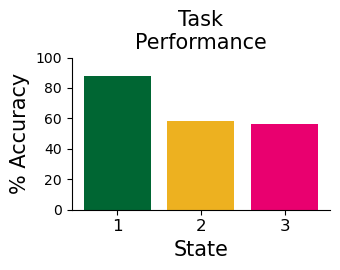

In [9]:
fig, axs = plt.subplots(1,figsize = (3.5,2.8), facecolor='w', edgecolor='k', dpi=dpi)

Frac_correct = figure_functions.calculate_fraction_correct()

for z, frac in enumerate(Frac_correct):
    axs.bar(z, frac*100 , width = 0.8, color = colors[z])
    
if num_states == 3:
    axs.set_xticks([0, 1, 2])
    axs.set_xticklabels(['1', '2', '3'], fontsize=12)
elif num_states == 4:
    axs.set_xticks([0, 1, 2, 3])
    axs.set_xticklabels(['1', '2', '3', '4'], fontsize=12)
elif num_states == 5:
    axs.set_xticks([0, 1, 2, 3, 4])
    axs.set_xticklabels(['1', '2', '3', '4', '5'], fontsize=12)

axs.set_yticks([0, 20, 40, 60, 80, 100], ['0', '20', '40', '60', '80', '100'])
axs.set_xlabel('State', size=15)
axs.set_ylabel('% Accuracy', size=15)
axs.set_title('Task\nPerformance', size=15)
fig.tight_layout()

#plt.savefig("perc_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.savefig('perc_accuracy.svg', format='svg', bbox_inches="tight")

print(Frac_correct)


## Figure 1H

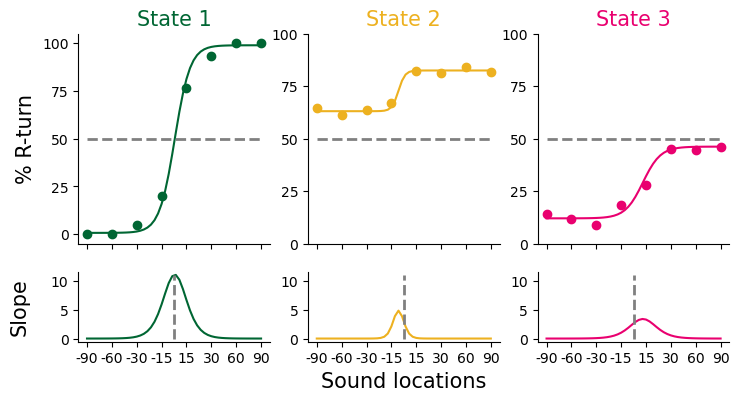

In [10]:
fig, axs = plt.subplots(2,3,figsize = (2.8*3,4), gridspec_kw={'height_ratios': [3, 1]}, sharex=True, dpi=100)

for state in [0,1,2]:
    axs[0,state].scatter(list(range(0,8)), y = np.array(right_states[state])*100, color=colors[state])
    #axs[0].errorbar(list(range(0,8)), y = np.array(right_states[0])*100, yerr=np.array(right_std)*100, color='black', linestyle='none')  # error bars
    axs[0,state].plot(np.linspace(0, 7, 50),np.array(psych_states[state][0])*100, label='cues', color = colors[state])
    axs[0,state].hlines(y=50, xmin=0, xmax=7, colors='grey', linestyles='--', lw=2)
    axs[0,state].set_xticks([])
    axs[0,state].set_yticks([0, 25,50,75,100])
    #axs.set_title('State '+str(state+1), fontsize=15)
    axs[0,0].set_ylabel('% R-turn', fontsize=15)
    axs[0,state].set_title('State {}'.format(state+1), fontsize=15, color=colors[state])

    y_data = np.array(psych_states[state][0])*100
    slopes = psychometrics.get_slope_measurement(y_data)

    axs[1,state].plot(np.linspace(0, 7, 50), slopes, color = colors[state])
    #axs[1].hlines(y=4, xmin=0, xmax=3.5, colors='grey', linestyles='--', lw=2)
    axs[1,state].vlines(x=3.5, ymin=0, ymax=11, colors='grey', linestyles='--', lw=2)
    axs[1,state].set_xticks(list(range(0,8)))
    axs[1,state].set_yticks(np.linspace(0, 10, 3))
    #axs[1,0].set_yticklabels(['0','1','2','3','4'])
    axs[1,0].set_xticklabels(['-90','-60','-30','-15','15','30','60','90'])
    axs[1,0].set_ylabel('Slope', fontsize=15, labelpad=15)
    axs[1,1].set_xlabel('Sound locations', fontsize=15)

#fig.savefig('pscyhometrics_states.svg', format='svg', bbox_inches="tight")



## Figure 1I

  0%|          | 0/2000 [00:00<?, ?it/s]

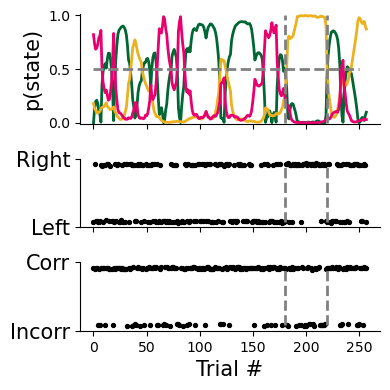

In [11]:
sesh_per_animal, posterior_prob_all_animals, slice_of_data, sess_id = figure_functions.compute_session_data_and_posterior_probabilities(glm_data_all, animal_ids, posterior_probs_rearrange, animal, date)

x = list(range(0,len(choice_sesh)))

fig, axs = plt.subplots(3,1, figsize = (4,4), sharex=True, 
                        gridspec_kw={'height_ratios': [0.8, 0.5, 0.5]}, dpi=100) #dpi=800

for k in range(num_states):
    axs[0].plot(np.array(posterior_prob_all_animals[animal][sess_id-1])[:,k], label="State " + str(k + 1), lw=2,
             color=colors[k])
axs[0].hlines(y=0.5, xmin=0, xmax=250, colors='grey', linestyles='--', lw=2)
axs[0].set_ylim((-0.01, 1.01))
axs[0].set_yticks([0, 0.5, 1])
axs[0].set_ylabel("p(state)", fontsize = 15)

for line in [0,1,2]:
    axs[line].vlines(x=180, ymin=0, ymax=1, colors='grey', linestyles='--', lw=2)
    axs[line].vlines(x=220, ymin=0, ymax=1, colors='grey', linestyles='--', lw=2)
    
choice_sesh = np.array(choice_sesh)
noise = np.random.normal(0, .01, choice_sesh.shape)
new_signal = choice_sesh + noise

axs[1].scatter(x,new_signal, color='black', s = 8) #s = 8
axs[1].set_yticks(ticks=[-.1, 1.1])
axs[1].set_yticklabels(labels=['Left','Right'], fontsize=15)

correct_sesh = np.array(correct_sesh)
noise = np.random.normal(0, .01, correct_sesh.shape)
new_signal = correct_sesh + noise

axs[2].scatter(x,new_signal, color='black', s = 8)
axs[2].set_yticks(ticks=[-.1, 1.1])
axs[2].set_yticklabels(labels=['Incorr','Corr'], fontsize=15)
axs[2].set_xlabel("Trial #", fontsize = 15)

fig.tight_layout()

## Supplemental figures related to GLM-HMM

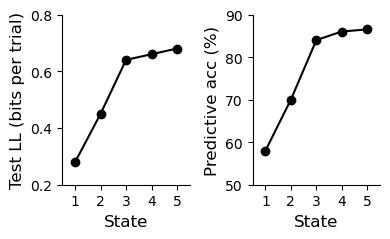

In [12]:
state_list = [1,2,3,4,5]
test_log_like_glmhmm, pred_acc_glm_hmm = figure_functions.load_cross_val_GLM_HMM(state_list)

fig, axs = plt.subplots(1, 2, figsize = (4,2.5), dpi=dpi, sharey=False)

axs[0].scatter(x=[0,1,2,3,4], y=test_log_like_glmhmm, color='black')
axs[0].plot(test_log_like_glmhmm, color='black')
axs[0].set_ylim([0.2,0.8])
#axs.set_title("Coupling\nPredictors", fontsize=15)
axs[0].set_xticks(list(range(0,5)))
axs[0].set_xticklabels(['1', '2', '3', '4', '5'])

axs[0].set_ylabel('Test LL (bits per trial)', fontsize=12)
axs[0].set_xlabel('State', fontsize=12)

axs[0].set_xlim([-0.5,4.5])

axs[1].scatter(x=[0,1,2,3,4], y=pred_acc_glm_hmm, color='black')
axs[1].plot(pred_acc_glm_hmm, color='black')
axs[1].set_ylim([50,90])
#axs.set_title("Coupling\nPredictors", fontsize=15)
axs[1].set_xticks(list(range(0,5)))
axs[1].set_xticklabels(['1', '2', '3', '4', '5'])

axs[1].set_ylabel('Predictive acc (%)', fontsize=12)
axs[1].set_xlabel('State', fontsize=12)

axs[1].set_xlim([-0.5,4.5])

fig.tight_layout()

#plt.savefig('validation_glmhmm.svg', format='svg', bbox_inches="tight")